## HDT 3 Elements of ML

### Raul Castellanos 20180052

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [6]:
SGPA = pd.read_csv('satgpa.csv')
SGPA.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


In [7]:
# Limpiando la columna de sexo a binaria 
SGPA['sex'] = SGPA['sex'].replace(2,0)

# Creando la columna de 1s 
SGPA = SGPA.assign(unos = 1)

SGPA.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa,unos
0,1,65,62,127,3.40,3.18,1
1,0,58,64,122,4.00,3.33,1
2,0,56,60,116,3.75,3.25,1
3,1,42,53,95,3.75,2.42,1
4,1,55,52,107,4.00,2.63,1


### Matrices

In [11]:
# Promedio de calificaciones a array de numpy (y)
y = SGPA[['fy_gpa']].to_numpy()
print(y.shape)

(1000, 1)


In [14]:
# Todas las otras. variables a array de numpy (x)
x = SGPA[['sex', 'sat_v', 'sat_m', 'hs_gpa', 'unos']].to_numpy()
print(x.shape)

(1000, 5)


### Función de Costo y Gradiente

In [15]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

In [16]:
def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)


### Thetas Cero

In [24]:
m,n = x.shape

theta_0 = np.random.rand(n,1)

### Función GD

In [25]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.00001, threshold=0.001, max_iter=10000): 
    
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [26]:
thetas, costs = gradient_descent(x,y,theta_0,linear_cost,linear_cost_gradient)

### Coeficientes de Theta y Costos

In [27]:
print(thetas)

[[ 0.51243131]
 [ 0.00840925]
 [-0.01690415]
 [ 0.82866223]
 [ 0.08459261]]


In [30]:
#  Algunos costos
print(costs[1:25])

[1614.4371509500183, 1442.8341560552087, 1289.48071309875, 1152.4360226240424, 1029.9656849047776, 920.5197497900577, 822.7131008999385, 735.307925918407, 657.198051131929, 587.3949419551818, 525.0151922699168, 469.2693442449677, 419.4518971436768, 374.932378672557, 335.14736587227924, 299.5933545692575, 267.82038714528977, 239.4263579798064, 214.05192449574153, 191.37595940442313, 171.11148659416165, 153.00204922810022, 136.81846408682637, 122.35592107946991]


### Costo Mínimo

In [38]:
print("Costo mínimo:",min(costs))

Costo mínimo: 0.23687473896803352


### Gráfica de Costos

Text(0.5, 1.0, 'Costos Mínimos')

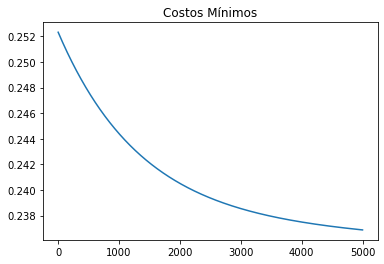

In [46]:
plt.plot(costs[5000:10000])
plt.title("Costos Mínimos")

In [45]:
print(thetas)

[[ 0.51243131]
 [ 0.00840925]
 [-0.01690415]
 [ 0.82866223]
 [ 0.08459261]]
